In [4]:
import pandas as pd
import numpy as np

import geobr

#visualização de dados 
import matplotlib.pyplot as plt
import seaborn as sns

#set same options in pandas 
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 140)

import warnings 
warnings.filterwarnings('ignore')

In [6]:
# all() : retorna True se todos os elementos forem True
# any() : retorna True se tiver pelo menos 1 true  

In [8]:
df_raw = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='latin1', sep=';')


In [12]:
df_raw.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.0,1193.0,1204.0,1211.0,502.0,498.9,475.6,363.2,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.0,140.0,200.0,100.0,120.0,140.0,700.0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.0,0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,2304400,Fortaleza,23,CE,1,1,1,1,1224.0,1192.0,1202.0,1214.0,459.0,508.5,507.2,466.7,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,140.0,200.0,160.0,180.0,200.0,880.0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.0,0,2311306.0,Quixadá,23.0,CE,2.0,1.0,1.0,2311306,Quixadá,23,CE,1,1,1,1,1222.0,1191.0,1201.0,1212.0,402.5,379.2,446.9,338.3,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [16]:
df_raw.TP_SEXO.map({'F':'Feminino', 'M':'Masculino'})

0          Masculino
1          Masculino
2           Feminino
3           Feminino
4           Feminino
             ...    
3933950    Masculino
3933951     Feminino
3933952     Feminino
3933953    Masculino
3933954     Feminino
Name: TP_SEXO, Length: 3933955, dtype: object

In [22]:
df_raw.TP_ESTADO_CIVIL.map({0 : 'Não Informado', 1 : 'Solteiro(a)', 2 : 'Casado(a)', 3 : 'Divorciado', 4 : 'Viuvo'})

0            Casado(a)
1            Casado(a)
2          Solteiro(a)
3          Solteiro(a)
4          Solteiro(a)
              ...     
3933950    Solteiro(a)
3933951    Solteiro(a)
3933952    Solteiro(a)
3933953    Solteiro(a)
3933954    Solteiro(a)
Name: TP_ESTADO_CIVIL, Length: 3933955, dtype: object

In [26]:
# 1 :  se for sexo = M
# 0 :  se for sexo = F
df_raw.TP_SEXO.map({'F': 0, 'M' : 1})

0          1
1          1
2          0
3          0
4          0
          ..
3933950    1
3933951    0
3933952    0
3933953    1
3933954    0
Name: TP_SEXO, Length: 3933955, dtype: int64

In [48]:
pd.get_dummies(df_raw.TP_SEXO, drop_first = True)

,M
0,True
1,True
2,False
3,False
4,False
...,...
3933950,True
3933951,False
3933952,False
3933953,True


In [66]:
def mapear_sexo(sexo):
    if sexo == 'F':
        return 'Feminino'
    else:
        return 'Masculino'

In [70]:
mapear_sexo('M')

'Masculino'

In [72]:
df_raw.TP_SEXO.apply(mapear_sexo)

0          Masculino
1          Masculino
2           Feminino
3           Feminino
4           Feminino
             ...    
3933950    Masculino
3933951     Feminino
3933952     Feminino
3933953    Masculino
3933954     Feminino
Name: TP_SEXO, Length: 3933955, dtype: object

In [74]:
df_raw.TP_SEXO.apply(mapear_sexo).value_counts()

TP_SEXO
Feminino     2411185
Masculino    1522770
Name: count, dtype: int64

In [76]:
df_raw.TP_SEXO.value_counts()

TP_SEXO
F    2411185
M    1522770
Name: count, dtype: int64

In [ ]:
def gerar_histograma(data_frame,
                     variavel,
                     bins = 30,
                     color = 'red',
                     xlabel = 'Variavel',
                     ylabel = 'Frequência',
                     titulo = 'Histograma',
                     fontsize = 15,
                     fontweight = 'bold',
                     figsize = (8,5)
                    ):
    fig, ax = plt.subplots(figsize = figsize)
    ax.hist(data_frame[variavel]), bins = bins, color = color)
    ax.set(xlabel = xlabel, ylabel = ylabel)
    axset_title(titulo, fontsize = fontsize, fintweight = fontweight):

def gerar_painel_barra(data_frame,
                       var,
                       hue
                     

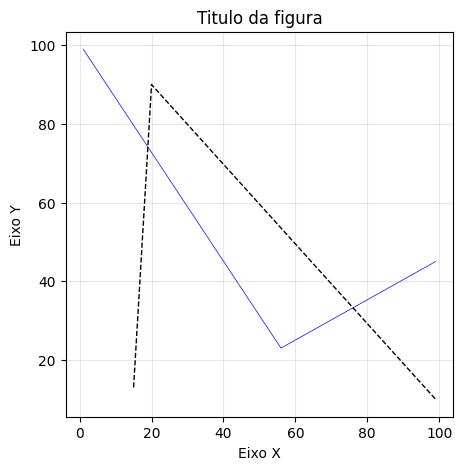

In [40]:
# cria a figura
plt.figure(figsize = (5,5))

# cria o plot
plt.plot([15, 20, 99], [13, 90, 10],
        color = 'black',
        linewidth = 1,
         linestyle = '--'
        )

# cria o plot 2
plt.plot([99, 56, 1], [45, 23, 99],
        color = 'blue',
        linewidth = 0.5
        )


#labels = rotulos
# rootulo do eixo x
plt.xlabel('Eixo X')

# rotulo eixo y
plt.ylabel('Eixo Y')

# titulo da figura
plt.title('Titulo da figura')

# grid liner
plt.grid(alpha = 0.3)

